In [40]:
import string
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder

# EDA

In [41]:
df = pd.read_csv('data/sentiment_analysis.csv')
df.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram


In [42]:
df.dtypes

Year              int64
Month             int64
Day               int64
Time of Tweet    object
text             object
sentiment        object
Platform         object
dtype: object

In [43]:
df.isnull().sum()

Year             0
Month            0
Day              0
Time of Tweet    0
text             0
sentiment        0
Platform         0
dtype: int64

For this project i will only use the text and the sentiment tag. I don't think the date or the platform are that relevant for text classification.

In [44]:
df = df[['text', 'sentiment']]
df.head()

,text,sentiment
0,What a great day!!! Looks like dream.,positive
1,"I feel sorry, I miss you here in the sea beach",positive
2,Don't angry me,negative
3,We attend in the class just for listening teac...,negative
4,"Those who want to go, let them go",negative


## Sentiment labels

### Checking different sentiment values

In [45]:
df.sentiment.unique()

array(['positive', 'negative', 'neutral'], dtype=object)

### Checking sentiment distribution

In [46]:
df.sentiment.value_counts()

sentiment
neutral     199
positive    166
negative    134
Name: count, dtype: int64

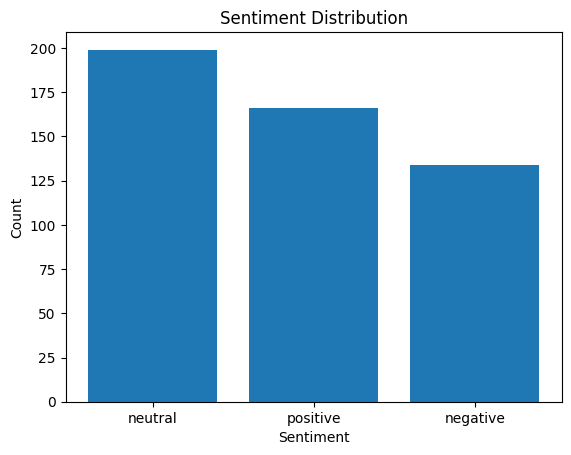

In [47]:
sentiment_count = df.sentiment.value_counts()
plt.bar(sentiment_count.index, sentiment_count.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

### Encoding sentiment labels

In [48]:
label_encoder = LabelEncoder()
label_encoder.fit(df.sentiment)
label_mapping = {label:encoded_label for label, encoded_label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}
print(label_mapping)

{'negative': np.int64(0), 'neutral': np.int64(1), 'positive': np.int64(2)}


In [49]:
df.sentiment = label_encoder.transform(df.sentiment)

In [50]:
df.head()

,text,sentiment
0,What a great day!!! Looks like dream.,2
1,"I feel sorry, I miss you here in the sea beach",2
2,Don't angry me,0
3,We attend in the class just for listening teac...,0
4,"Those who want to go, let them go",0


## Preprocess text

### Lowercase

In [51]:
df.text = df.text.str.lower()
df.head()

,text,sentiment
0,what a great day!!! looks like dream.,2
1,"i feel sorry, i miss you here in the sea beach",2
2,don't angry me,0
3,we attend in the class just for listening teac...,0
4,"those who want to go, let them go",0


### Remove punctuation marks

In [52]:
df.text = df.text.str.replace('[{}]'.format(string.punctuation), '', regex=True)
df.head()

,text,sentiment
0,what a great day looks like dream,2
1,i feel sorry i miss you here in the sea beach,2
2,dont angry me,0
3,we attend in the class just for listening teac...,0
4,those who want to go let them go,0


### Remove stop words

In [53]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df.text = df.text.apply(lambda t: ' '.join(w for w in t.split() if w not in stop_words))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kasteion/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
df.head()

,text,sentiment
0,great day looks like dream,2
1,feel sorry miss sea beach,2
2,dont angry,0
3,attend class listening teachers reading slide ...,0
4,want go let go,0
